<a href="https://colab.research.google.com/github/SatyendraRock/Ecommerce-Sales-Analytics-End-to-End-/blob/main/E_commerce_Sales_Analytics_Dashboard_%7C_Power_BI_%2B_SQL_%2B_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧾 Step 3: Colab Starter Code (Copy-Paste First Cell)

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

print("Libraries Imported Successfully")

Libraries Imported Successfully


Step 4: Upload Dataset to **Colab**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


Step 5: Load & Understand Data (VERY IMPORTANT FOR INTERVIEWS)

In [ ]:
# Load dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Show first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
# Shape of dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (9994, 21)


In [ ]:
# Check missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Step 6: Data Cleaning (Industry Standard Step)

In [ ]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
# Create Year and Month columns (important for dashboard)
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
print("Data Cleaning Completed")

Data Cleaning Completed


**📊 Step 7: Exploratory Data Analysis (EDA – Recruiters LOVE This)**

In [ ]:
#7.1 Total Sales & Profit

total_sales = df['Sales'].sum()

In [ ]:
total_profit = df['Profit'].sum()

In [ ]:
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 2297200.8603000003
Total Profit: 286397.0217


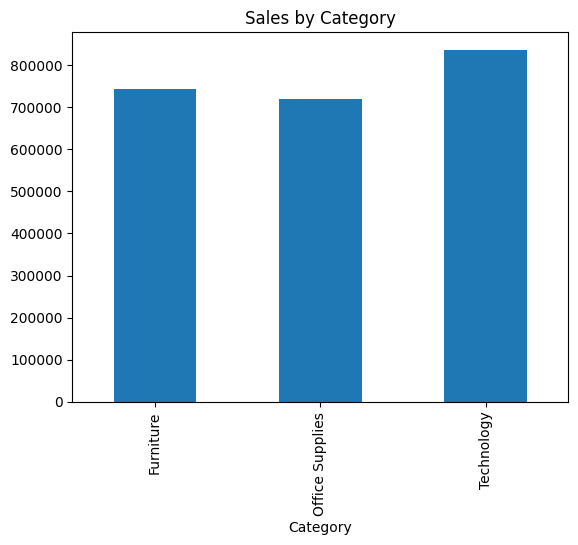

In [ ]:
#7.2 Sales by Category

df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Sales by Category')
plt.show()

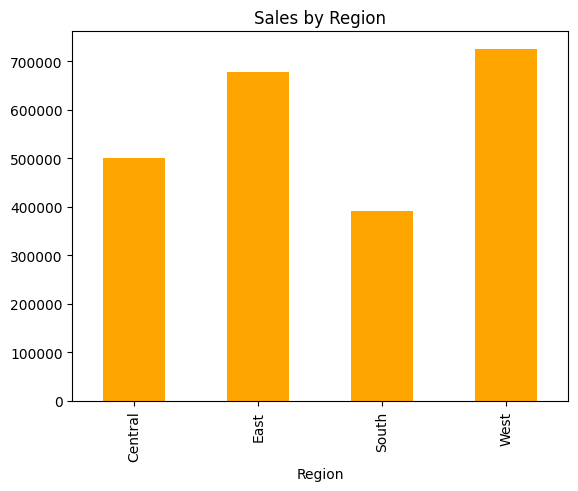

In [ ]:
#7.3 Sales by Region

df.groupby('Region')['Sales'].sum().plot(kind='bar', title='Sales by Region', color='orange')
plt.show()

In [ ]:
total_orders = df['Order ID'].nunique()

In [ ]:
print("Total Sales: $", round(total_sales,2))
print("Total Profit: $", round(total_profit,2))
print("Total Orders:", total_orders)

Total Sales: $ 2297200.86
Total Profit: $ 286397.02
Total Orders: 5009


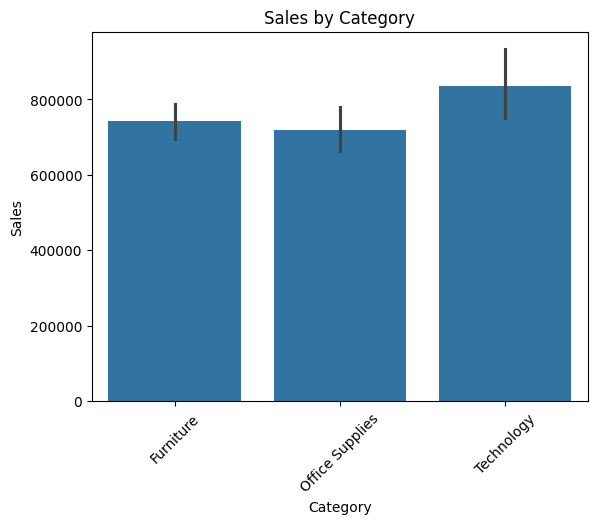

In [ ]:
#Sales by Category (Business Insight)plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Month_Name'] = df['Order Date'].dt.month_name()

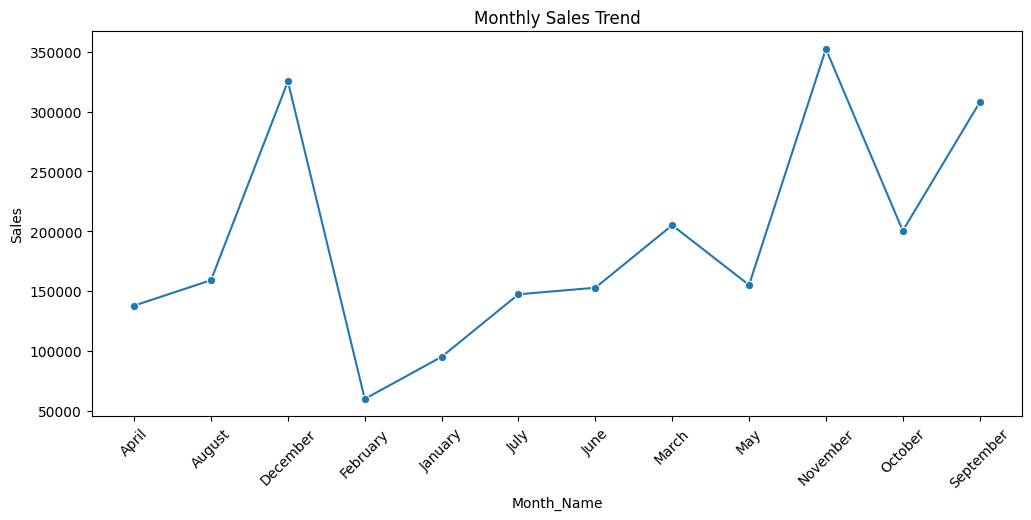

In [ ]:
#Monthly Sales Trend (Dashboard Ready)

monthly_sales = df.groupby('Month_Name')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(x='Month_Name', y='Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


# #🗄️ Step 8 (NEXT): SQL Analysis

# After EDA, we will run SQL queries like:

# Top 10 customers by sales

# Monthly revenue trend

# Most profitable category

# Region-wise performance

# This makes your project industry-level, not beginner.

#🗄️ STEP 6 — SQL Integration (REAL INDUSTRY SKILL)

Now we convert dataset into SQL database (very impressive for recruiters).

In [ ]:
import sqlite3

In [ ]:
# Create SQLite database
conn = sqlite3.connect('ecommerce_sales.db')



In [ ]:
# Export dataframe to SQL table
df.to_sql('sales_data', conn, if_exists='replace', index=False)

9994

In [ ]:
print("Database Created Successfully")

Database Created Successfully


#🔥 STEP 7 — Advanced SQL Queries



In [ ]:
query1 = """
SELECT "Customer Name", SUM(Sales) AS Total_Sales
FROM sales_data
GROUP BY "Customer Name"
ORDER BY Total_Sales DESC
LIMIT 10;
"""
pd.read_sql(query1, conn)

,Customer Name,Total_Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


#2️⃣ Sales by Region

In [ ]:
query2 = """
SELECT Region, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
FROM sales_data
GROUP BY Region
ORDER BY Total_Sales DESC;
"""
pd.read_sql(query2, conn)

,Region,Total_Sales,Total_Profit
0,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,Central,501239.8908,39706.3625
3,South,391721.9050,46749.4303


In [ ]:
query3 = """
SELECT Category, SUM(Profit) AS Total_Profit
FROM sales_data
GROUP BY Category
ORDER BY Total_Profit DESC;
"""
pd.read_sql(query3, conn)

,Category,Total_Profit
0,Technology,145454.9481
1,Office Supplies,122490.8008
2,Furniture,18451.2728


#2️⃣ Monthly Sales Trend

In [ ]:
query3 = """
SELECT Year, Month, SUM(Sales) AS Monthly_Sales
FROM sales_data
GROUP BY Year, Month
ORDER BY Year, Month;
"""
pd.read_sql(query3, conn)

,Year,Month,Monthly_Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


#📤 STEP 8 — Export Clean Data for Power BI (Critical Step)

In [ ]:
# Export cleaned dataset for Power BI
df.to_csv('cleaned_ecommerce_data.csv', index=False)

print("File Exported: cleaned_ecommerce_data.csv")

File Exported: cleaned_ecommerce_data.csv


#📊 STEP 9 — Power BI Dashboard


Create these visuals:

KPI Cards → Total Sales, Profit, Orders

Sales by Category (Bar Chart)

Sales by Region (Map/Bar)

Monthly Sales Trend (Line Chart)

Top 10 Customers (Table)

Profit by Segment (Donut Chart)

This dashboard = 70% of shortlist chances.